In [1]:
import os
import sys
import functools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

sys.path.append("../")

In [2]:
# from pywatershed import load_wbl_output, load_prms_input
import pywatershed

In [3]:
# conversion factors
inch_to_meter = 0.0254
acre_to_meter_squared = 4046.8564224
unit_conversion = False

# Read PRMS water budget output files

In [4]:
wbal_df = pywatershed.load_wbl_output(
    "../prms_models/box01", verbose=True, convert=False
)
wbal_df

soilzone_water_bal  soilzone_bsmbal  soilzone_last_sm  \
Date                                                                
1980-10-01                 0.0              0.0           0.00000   
1980-10-02                 0.0             -0.0           0.00000   
1980-10-03                 0.0              0.0           0.09273   
1980-10-04                 0.0              0.0           0.32037   
1980-10-05                -0.0             -0.0           0.34967   
...                        ...              ...               ...   
2019-12-27                -0.0             -0.0           1.54931   
2019-12-28                -0.0             -0.0           1.48013   
2019-12-29                -0.0             -0.0           1.41081   
2019-12-30                 0.0              0.0           2.07781   
2019-12-31                -0.0             -0.0           2.16863   

            soilzone_soilmoist  soilzone_last_stor  soilzone_ss_stor  \
Date                                                                   
1980-10-01             0.00000             0.00000           0.00000   
1980-10-02             0.09273             0.00000           0.00000   
1980-10-03             0.32037             0.00000           0.00000   
1980-10-04             0.34967             0.00000           0.00000   
1980-10-05             0.31598             0.00000           0.00000   
...                        ...                 ...               ...   
2019-12-27             1.48013             0.02083           0.01775   
2019-12-28             1.41081             0.01775           0.01521   
2019-12-29             2.07781             0.01521           0.01310   
2019-12-30             2.16863             0.01310           0.21920   
2019-12-31             2.16840             0.21920           0.16309   

            soilzone_perv_et  soilzone_sz2gw  soilzone_interflow  \
Date                                                               
1980-10-01          -0.00000        -0.00000            -0.00000   
1980-10-02          -0.01027        -0.00000            -0.00000   
1980-10-03          -0.03510        -0.00000            -0.00000   
1980-10-04          -0.03790        -0.00000            -0.00000   
1980-10-05          -0.03369        -0.00000            -0.00000   
...                      ...             ...                 ...   
2019-12-27          -0.06918        -0.00285            -0.00024   
2019-12-28          -0.06932        -0.00235            -0.00018   
2019-12-29          -0.06949        -0.00196            -0.00015   
2019-12-30          -0.06969        -0.06707            -0.08751   
2019-12-31          -0.06991        -0.04600            -0.01609   

            soilzone_soil2gw  ...  gwflow_water_bal  gwflow_last_store  \
Date                          ...                                        
1980-10-01          -0.00000  ...               0.0            2.00000   
1980-10-02          -0.00000  ...              -0.0            1.94485   
1980-10-03          -0.00000  ...               0.0            1.89121   
1980-10-04          -0.00000  ...               0.0            1.83906   
1980-10-05          -0.00000  ...               0.0            1.78834   
...                      ...  ...               ...                ...   
2019-12-27          -0.00000  ...               0.0            0.41149   
2019-12-28          -0.00000  ...              -0.0            0.40291   
2019-12-29          -0.00000  ...              -0.0            0.39409   
2019-12-30          -0.01831  ...               0.0            0.38513   
2019-12-31          -0.01831  ...               0.0            0.45752   

            gwflow_gwr_store  gwflow_gw_input  gwflow_gw_flow  gwflow_gw_sink  \
Date                                                                            
1980-10-01           1.94485          0.00000        -0.05515            -0.0   
1980-10-02           1.89121          0.00000        -0.05363            -0.0   
1980-

In [5]:
wbal_df.columns

Index(['soilzone_water_bal', 'soilzone_bsmbal', 'soilzone_last_sm',
       'soilzone_soilmoist', 'soilzone_last_stor', 'soilzone_ss_stor',
       'soilzone_perv_et', 'soilzone_sz2gw', 'soilzone_interflow',
       'soilzone_soil2gw', 'soilzone_dunnian', 'soilzone_soil_in',
       'soilzone_lakeinsz', 'soilzone_downflow', 'soilzone_swale_et',
       'soilzone_pref_flow', 'soilzone_pfr_dunn', 'soilzone_pfr_stor',
       'soilzone_slow_stor', 'soilzone_dunnian_gvr', 'soilzone_lake_evap',
       'intcp_water_bal', 'intcp_precip', 'intcp_netppt', 'intcp_intcpevap',
       'intcp_intcpstor', 'intcp_last_stor', 'intcp_changeover',
       'intcp_net_apply', 'intcp_apply', 'srunoff_smidx_water_bal',
       'srunoff_smidx_robal', 'srunoff_smidx_sroff', 'srunoff_smidx_infil',
       'srunoff_smidx_impervevap', 'srunoff_smidx_impervstor',
       'srunoff_smidx_dprst_evap', 'srunoff_smidx_dprst_seep',
       'srunoff_smidx_perv_sro', 'srunoff_smidx_imperv_sro',
       'srunoff_smidx_dprst_sro', 'sru

# Load PRMS5 Input and Output Files for NHM Basin

In [6]:
input_data_path = "../prms_models/box01/input"
output_data_path = "../prms_models/box01/output"

### Input files

In [7]:
input_data_path
datanames = ["precipitation", "temp_min", "temp_max"]
filenames = ["prcp.cbh", "tmin.cbh", "tmax.cbh"]
input_df = pywatershed.load_prms_input(
    input_data_path, datanames, filenames, verbose=True, convert=False
)
input_df

Loading ../prms_models/box01/input/prcp.cbh
Loading ../prms_models/box01/input/tmin.cbh
Loading ../prms_models/box01/input/tmax.cbh


precipitation  temp_min  temp_max
date                                         
1979-01-01           0.00      31.0      43.6
1979-02-01           0.04      31.0      47.2
1979-03-01           0.02      34.1      53.0
1979-04-01           0.49      38.2      53.7
1979-05-01           0.48      34.9      42.9
...                   ...       ...       ...
2019-12-27           0.00      34.2      50.6
2019-12-28           0.00      29.1      48.3
2019-12-29           0.76      29.6      41.8
2019-12-30           0.82      34.6      39.6
2019-12-31           0.11      35.3      43.8

[14976 rows x 3 columns]

In [8]:
input_df["precipitation"].to_numpy()

array([0.  , 0.04, 0.02, ..., 0.76, 0.82, 0.11])

### PRMS output

#### csv output files

In [9]:
# load prms output
csvfiles = [f for f in os.listdir(output_data_path) if f.endswith(".csv")]
csvfiles.remove("stats.csv")
output_df = pywatershed.load_prms_output(
    output_data_path, csvfiles, convert=True, verbose=True
)
output_df

dataframe conversion...
converting hru_ppt...using 0.0254 multipler


soil_moist_tot  hru_impervstor  net_snow   net_ppt  hru_sroffp  \
date                                                                         
1980-10-01        0.000000             0.0       0.0  0.000000    0.000000   
1980-10-02        0.092735             0.0       0.0  0.103031    0.000027   
1980-10-03        0.320372             0.0       0.0  0.262855    0.000116   
1980-10-04        0.349669             0.0       0.0  0.067242    0.000043   
1980-10-05        0.315975             0.0       0.0  0.000000    0.000000   
...                    ...             ...       ...       ...         ...   
2019-12-27        1.497882             0.0       0.0  0.000000    0.000000   
2019-12-28        1.426021             0.0       0.0  0.000000    0.000000   
2019-12-29        2.090915             0.0       0.0  0.771318    0.034829   
2019-12-30        2.387826             0.0       0.0  0.833169    0.293684   
2019-12-31        2.331490             0.0       0.0  0.111767    0.017797   

            hru_snow      tmaxf      tminf  intcp_stor  canopy_covden  \
date                                                                    
1980-10-01       0.0  71.098717  69.633911    0.000000       0.230835   
1980-10-02       0.0  71.098717  69.633911    0.003847       0.230835   
1980-10-03       0.0  71.098717  69.633911    0.003847       0.230835   
1980-10-04       0.0  71.098717  69.633911    0.003847       0.230835   
1980-10-05       0.0  71.098717  69.633911    0.000000       0.230835   
...              ...        ...        ...         ...            ...   
2019-12-27       0.0  69.326889  70.423889    0.000000       0.230835   
2019-12-28       0.0  69.326889  70.423889    0.000000       0.230835   
2019-12-29       0.0  69.326889  70.423889    0.003847       0.230835   
2019-12-30       0.0  69.326889  70.423889    0.003847       0.230835   
2019-12-31       0.0  69.326889  70.423889    0.003847       0.230835   

            net_rain  intcp_evap   hru_ppt  hru_sroffi  hru_rain  \
date                                                               
1980-10-01  0.000000    0.000000  0.000000         0.0  0.000000   
1980-10-02  0.103031    0.000000  0.002640         0.0  0.103919   
1980-10-03  0.262855    0.000000  0.006677         0.0  0.262855   
1980-10-04  0.067242    0.000000  0.001708         0.0  0.067242   
1980-10-05  0.000000    0.003847  0.000000         0.0  0.000000   
...              ...         ...       ...         ...       ...   
2019-12-27  0.000000    0.000000  0.000000         0.0  0.000000   
2019-12-28  0.000000    0.000000  0.000000         0.0  0.000000   
2019-12-29  0.771318    0.000000  0.019614         0.0  0.772206   
2019-12-30  0.833169    0.000000  0.021162         0.0  0.833169   
2019-12-31  0.111767    0.000000  0.002839         0.0  0.111767   

            soil_moist_ante  hru_impervevap  
date                                         
1980-10-01         0.000000             0.0  
1980-10-02         0.000000             0.0  
1980-10-03         0.092735             0.0  
1980-10-04         0.320372             0.0  
1980-10-05         0.349669             0.0  
...                     ...             ...  
2019-12-27         1.549313             0.0  
2019-12-28         1.480134             0.0  
2019-12-29         1.410813             0.0  
2019-12-30         2.077811             0.0  
2019-12-31         2.168627             0.0  

[14336 rows x 17 columns]

In [10]:
output_df.index

DatetimeIndex(['1980-10-01', '1980-10-02', '1980-10-03', '1980-10-04',
               '1980-10-05', '1980-10-06', '1980-10-07', '1980-10-08',
               '1980-10-09', '1980-10-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', length=14336, freq=None)

#### stats csv file

In [11]:
# load the prms5 stats.csv file
fname = os.path.join(output_data_path, "stats.csv")
prms_stats_df = pywatershed.load_prms_statscsv(fname, verbose=True, convert=False)
prms_stats_df.columns

Index(['basin_potet', 'basin_actet', 'basin_dprst_evap', 'basin_imperv_evap',
       'basin_intcp_evap', 'basin_lakeevap', 'basin_perv_et', 'basin_snowevap',
       'basin_swrad', 'basin_ppt', 'basin_pk_precip', 'basin_tmax',
       'basin_tmin', 'basin_snowcov', 'basin_total_storage',
       'basin_surface_storage', 'basin_dprst_volcl', 'basin_dprst_volop',
       'basin_gwstor', 'basin_imperv_stor', 'basin_intcp_stor',
       'basin_lake_stor', 'basin_pweqv', 'basin_soil_moist', 'basin_ssstor',
       'basin_pref_stor', 'basin_slstor', 'basin_soil_rechr',
       'basin_capwaterin', 'basin_dprst_seep', 'basin_gwin',
       'basin_pref_flow_in', 'basin_recharge', 'basin_snowmelt',
       'basin_soil_to_gw', 'basin_sz2gw', 'basin_gwsink', 'basin_prefflow',
       'basin_slowflow', 'basin_hortonian', 'basin_dunnian', 'basin_stflow_in',
       'basin_stflow_out', 'basin_gwflow', 'basin_dnflow',
       'basin_gwstor_minarea_wb', 'basin_cfs', 'basin_gwflow_cfs',
       'basin_sroff_cfs', 'b

In [12]:
prms_stats_df.loc[:, ["basin_intcp_stor", "basin_intcp_evap", "basin_potet"]]

basin_intcp_stor  basin_intcp_evap  basin_potet
date                                                       
1980-10-01          0.000000          0.000000     0.184054
1980-10-02          0.000888          0.000000     0.182316
1980-10-03          0.000888          0.000000     0.180578
1980-10-04          0.000888          0.000000     0.178840
1980-10-05          0.000000          0.000888     0.177102
...                      ...               ...          ...
2019-12-27          0.000000          0.000000     0.069179
2019-12-28          0.000000          0.000000     0.069321
2019-12-29          0.000888          0.000000     0.069490
2019-12-30          0.000888          0.000000     0.069687
2019-12-31          0.000888          0.000000     0.069910

[14336 rows x 3 columns]

# Run Python NHM

In [13]:
start_time = datetime.datetime(1980, 10, 1)
end_time = datetime.datetime(2019, 12, 31)
# end_time = datetime.datetime(1981, 10, 1)
delta_time = datetime.timedelta(days=1)
print(start_time, end_time)

1980-10-01 00:00:00 2019-12-31 00:00:00


In [14]:
# # for now assume rainfall is the precipitation input - can't use this because of adjustments of rainfall data
# date_mask = (input_df.index >= start_time) & (input_df.index <= end_time)
# rainfall = input_df.loc[date_mask, ["precipitation"]]
# rainfall = np.array(rainfall).flatten()
# rainfall

# assume that rainfall is the hru_ppt data in the NHM output
date_mask = (output_df.index >= start_time) & (output_df.index <= end_time)
rainfall = output_df.loc[date_mask, ["hru_ppt"]]
rainfall = np.array(rainfall).flatten()
rainfall

array([0.        , 0.00263955, 0.00667651, ..., 0.01961402, 0.0211625 ,
       0.00283887])

In [15]:
# for now provide potential ET as basin_potet prms output
date_mask = (prms_stats_df.index >= start_time) & (prms_stats_df.index <= end_time)
potential_evapotranspiration = prms_stats_df.loc[date_mask, ["basin_potet"]]
potential_evapotranspiration = np.array(potential_evapotranspiration).flatten()
potential_evapotranspiration.shape, potential_evapotranspiration

((14336,),
 array([0.18405412, 0.18231641, 0.18057807, ..., 0.06949047, 0.06968679,
        0.06990993]))

In [16]:
prms_stats_df.columns

Index(['basin_potet', 'basin_actet', 'basin_dprst_evap', 'basin_imperv_evap',
       'basin_intcp_evap', 'basin_lakeevap', 'basin_perv_et', 'basin_snowevap',
       'basin_swrad', 'basin_ppt', 'basin_pk_precip', 'basin_tmax',
       'basin_tmin', 'basin_snowcov', 'basin_total_storage',
       'basin_surface_storage', 'basin_dprst_volcl', 'basin_dprst_volop',
       'basin_gwstor', 'basin_imperv_stor', 'basin_intcp_stor',
       'basin_lake_stor', 'basin_pweqv', 'basin_soil_moist', 'basin_ssstor',
       'basin_pref_stor', 'basin_slstor', 'basin_soil_rechr',
       'basin_capwaterin', 'basin_dprst_seep', 'basin_gwin',
       'basin_pref_flow_in', 'basin_recharge', 'basin_snowmelt',
       'basin_soil_to_gw', 'basin_sz2gw', 'basin_gwsink', 'basin_prefflow',
       'basin_slowflow', 'basin_hortonian', 'basin_dunnian', 'basin_stflow_in',
       'basin_stflow_out', 'basin_gwflow', 'basin_dnflow',
       'basin_gwstor_minarea_wb', 'basin_cfs', 'basin_gwflow_cfs',
       'basin_sroff_cfs', 'b

<AxesSubplot:xlabel='Date'>

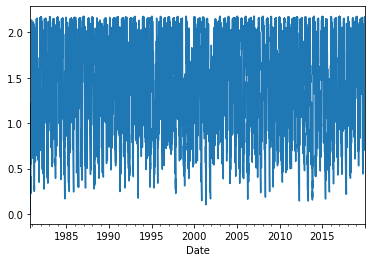

In [17]:
wbal_df["soilzone_last_sm"].plot()

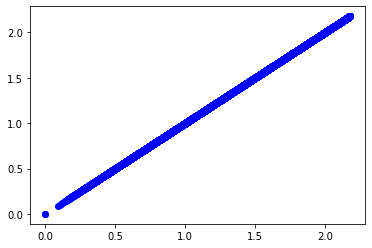

In [18]:
plt.plot(wbal_df["soilzone_last_sm"], output_df["soil_moist_ante"], "bo")

In [19]:
# for now provide previous soil moisture for runoff calculation
date_mask = (output_df.index >= start_time) & (output_df.index <= end_time)
soil_moisture0_in = output_df.loc[date_mask, ["soil_moist_ante"]].to_numpy().flatten()
soil_moisture0_in.shape, soil_moisture0_in.dtype, soil_moisture0_in

((14336,),
 dtype('float64'),
 array([0.        , 0.        , 0.09273492, ..., 1.41081345, 2.07781148,
        2.16862655]))

### Setup the model

In [20]:
# run a pynhm run
# rainfall = [4.5, 0., 0., 0., 0.]
# potential_evapotranspiration = len(rainfall) * [1.]

# Assign input variables and convert to metric units
area = 1.0 * acre_to_meter_squared

# forcings
# rainfall *= inch_to_meter
potential_evapotranspiration *= inch_to_meter

# interception
intcp_stor_max = 0.003847 * inch_to_meter
covden = 0.2308

# surface runoff
hru_percent_imperv = 0.0
imperv_stor_start = 0.0 * inch_to_meter
imperv_stor_max = 0.0500000 * inch_to_meter
carea_min = 0.0  # default
carea_max = 1.0
soil_rechr_max_frac = 0.8170124
smidx_coef = 0.0002278
smidx_exp = 1.2787037  # 1 / inch
smidx_exp = smidx_exp / inch_to_meter
soil_moisture0_in *= inch_to_meter

forcings = pywatershed.AtmosphericForcings(rainfall, potential_evapotranspiration)

cnp = pywatershed.prmsCanopy(
    id=0,
    area=area,
    forcing=forcings,
    verbose=False,
    intcp_stor_start=0.0,
    intcp_stor_max=intcp_stor_max,
    covden=covden,
)

sro = pywatershed.prmsSurfaceRunoff(
    id=1,
    area=area,
    forcing=forcings,
    verbose=False,
    hru_percent_imperv=hru_percent_imperv,
    imperv_stor_start=imperv_stor_start,
    imperv_stor_max=imperv_stor_max,
    carea_min=carea_min,
    carea_max=carea_max,
    soil_rechr_max_frac=soil_rechr_max_frac,
    smidx_coef=smidx_coef,
    smidx_exp=smidx_exp,
    soil_moisture0_in=soil_moisture0_in,
)

# connect storage units
cnp.register_recipient(sro, "net_precipitation")

# create list of storage units in order of flow calculation
storage_units = [cnp, sro]

time_length = float(delta_time.days)

current_time = start_time
itime_step = 0

### Run the model

In [21]:
verbose = False
driver = pywatershed.driver(
    current_time, end_time, delta_time, forcings, storage_units, verbose=verbose
)
driver.run()

Initializing simulation...
Finalizing simulation...


# Process Canopy Budget

In [22]:
# output for python version
cnp_df = pd.DataFrame(np.array(cnp.output_data), columns=cnp.output_column_names)
cnp_df

date     precip       aet  intcp_ds net_precip residual  \
0     1980-10-01        0.0      -0.0      -0.0       -0.0      0.0   
1     1980-10-02   10.68188      -0.0 -0.091266 -10.590614     -0.0   
2     1980-10-03  27.018874 -0.091266      -0.0 -26.927608     -0.0   
3     1980-10-04   6.911805 -0.091266      -0.0  -6.820539      0.0   
4     1980-10-05        0.0 -0.091266  0.091266       -0.0      0.0   
...          ...        ...       ...       ...        ...      ...   
14331 2019-12-27        0.0      -0.0      -0.0       -0.0      0.0   
14332 2019-12-28        0.0      -0.0      -0.0       -0.0      0.0   
14333 2019-12-29  79.375131      -0.0 -0.091266 -79.283865      0.0   
14334 2019-12-30  85.641586 -0.091266      -0.0  -85.55032      0.0   
14335 2019-12-31  11.488506 -0.091266      -0.0  -11.39724      0.0   

      intcp_stor_new intcp_stor_old  
0                0.0            0.0  
1           0.000098            0.0  
2           0.000098       0.000098  
3           0.000098       0.000098  
4                0.0       0.000098  
...              ...            ...  
14331            0.0            0.0  
14332            0.0            0.0  
14333       0.000098            0.0  
14334       0.000098       0.000098  
14335       0.000098       0.000098  

[14336 rows x 8 columns]

In [23]:
# calculate english equivalents for comparison with prms
conversion = [
    ("precip", 1.0 / area / inch_to_meter),
    ("aet", 1.0 / area / inch_to_meter),
    ("intcp_ds", 1.0 / area / inch_to_meter),
    ("net_precip", 1.0 / area / inch_to_meter),
    # ("net_precip", 1. / area),
    ("residual", 1.0 / area / inch_to_meter),
    ("intcp_stor_new", 1.0 / inch_to_meter),
    ("intcp_stor_old", 1.0 / inch_to_meter),
]
cnp_english_df = cnp_df.copy()
for name, conversion_factor in conversion:
    cnp_english_df[name] *= conversion_factor
cnp_english_df

date    precip       aet  intcp_ds net_precip residual  \
0     1980-10-01       0.0      -0.0      -0.0       -0.0      0.0   
1     1980-10-02  0.103919      -0.0 -0.000888  -0.103031     -0.0   
2     1980-10-03  0.262855 -0.000888      -0.0  -0.261967     -0.0   
3     1980-10-04  0.067242 -0.000888      -0.0  -0.066354      0.0   
4     1980-10-05       0.0 -0.000888  0.000888       -0.0      0.0   
...          ...       ...       ...       ...        ...      ...   
14331 2019-12-27       0.0      -0.0      -0.0       -0.0      0.0   
14332 2019-12-28       0.0      -0.0      -0.0       -0.0      0.0   
14333 2019-12-29  0.772206      -0.0 -0.000888  -0.771318      0.0   
14334 2019-12-30  0.833169 -0.000888      -0.0  -0.832281      0.0   
14335 2019-12-31  0.111767 -0.000888      -0.0  -0.110879      0.0   

      intcp_stor_new intcp_stor_old  
0                0.0            0.0  
1           0.003847            0.0  
2           0.003847       0.003847  
3           0.003847       0.003847  
4                0.0       0.003847  
...              ...            ...  
14331            0.0            0.0  
14332            0.0            0.0  
14333       0.003847            0.0  
14334       0.003847       0.003847  
14335       0.003847       0.003847  

[14336 rows x 8 columns]

In [24]:
# PRMS output
output_df.loc[:, ["hru_ppt", "net_ppt", "intcp_stor", "intcp_evap"]]

hru_ppt   net_ppt  intcp_stor  intcp_evap
date                                                  
1980-10-01  0.000000  0.000000    0.000000    0.000000
1980-10-02  0.002640  0.103031    0.003847    0.000000
1980-10-03  0.006677  0.262855    0.003847    0.000000
1980-10-04  0.001708  0.067242    0.003847    0.000000
1980-10-05  0.000000  0.000000    0.000000    0.003847
...              ...       ...         ...         ...
2019-12-27  0.000000  0.000000    0.000000    0.000000
2019-12-28  0.000000  0.000000    0.000000    0.000000
2019-12-29  0.019614  0.771318    0.003847    0.000000
2019-12-30  0.021162  0.833169    0.003847    0.000000
2019-12-31  0.002839  0.111767    0.003847    0.000000

[14336 rows x 4 columns]

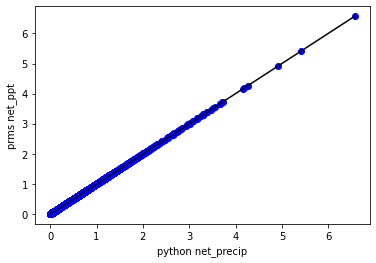

In [25]:
d1 = np.array(-cnp_english_df["net_precip"])
d2 = np.array(output_df["net_ppt"])
ax = plt.subplot(1, 1, 1)
ax.plot(d1, d2, "bo")
ax.set_xlabel("python net_precip")
ax.set_ylabel("prms net_ppt")
dmax = max(d1.max(), d2.max())
ax.plot([0, dmax], [0, dmax], "k-")

In [26]:
err = d2 - d1
print(err.min(), err.max(), err.mean())

-4.6239999829111866e-07 0.000887887600001136 0.0002253526851304559


Text(0, 0.5, 'net_ppt error (prms - python)')

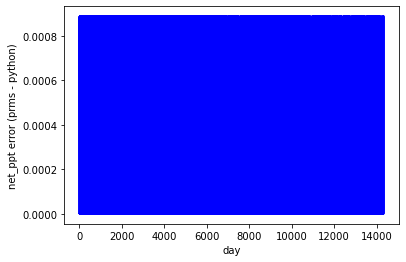

In [27]:
ax = plt.subplot(1, 1, 1)
ax.plot(err, "b-")
ax.set_xlabel("day")
ax.set_ylabel("net_ppt error (prms - python)")

# Process Surface Runoff

In [28]:
# output for python version
sro_df = pd.DataFrame(np.array(sro.output_data), columns=sro.output_column_names)
sro_df

date net_precipitation impervious_runoff impervious_ds  \
0     1980-10-01               0.0              -0.0          -0.0   
1     1980-10-02         10.590614              -0.0          -0.0   
2     1980-10-03         26.927608              -0.0          -0.0   
3     1980-10-04          6.820539              -0.0          -0.0   
4     1980-10-05               0.0              -0.0           0.0   
...          ...               ...               ...           ...   
14331 2019-12-27               0.0              -0.0          -0.0   
14332 2019-12-28               0.0              -0.0          -0.0   
14333 2019-12-29         79.283865              -0.0          -0.0   
14334 2019-12-30          85.55032              -0.0          -0.0   
14335 2019-12-31          11.39724              -0.0          -0.0   

      impervious_et pervious_runoff infiltration residual impervious_stor_new  \
0              -0.0            -0.0         -0.0      0.0                 0.0   
1              -0.0       -0.002808   -10.587807      0.0             0.00127   
2              -0.0       -0.011853   -26.915755      0.0             0.00127   
3              -0.0         -0.0044    -6.816139      0.0             0.00127   
4              -0.0            -0.0         -0.0      0.0                 0.0   
...             ...             ...          ...      ...                 ...   
14331          -0.0            -0.0         -0.0      0.0                 0.0   
14332          -0.0            -0.0         -0.0      0.0                 0.0   
14333          -0.0       -3.580093   -75.703772      0.0             0.00127   
14334          -0.0      -30.116268   -55.434051      0.0             0.00127   
14335          -0.0       -1.812486    -9.584754      0.0             0.00127   

      impervious_stor_old  
0                     0.0  
1                     0.0  
2                 0.00127  
3                 0.00127  
4                 0.00127  
...                   ...  
14331                 0.0  
14332                 0.0  
14333                 0.0  
14334             0.00127  
14335             0.00127  

[14336 rows x 10 columns]

In [29]:
# convert to english units for prms comparison
conversion = [
    ("net_precipitation", 1.0 / area / inch_to_meter),
    ("impervious_runoff", 1.0 / area / inch_to_meter),
    # ("impervious_runoff", 1. / area),
    ("impervious_ds", 1.0 / area / inch_to_meter),
    ("impervious_et", 1.0 / area / inch_to_meter),
    ("pervious_runoff", 1.0 / area / inch_to_meter),
    # ("pervious_runoff", 1. / area),
    ("infiltration", 1.0 / area / inch_to_meter),
    ("residual", 1.0 / area / inch_to_meter),
    ("impervious_stor_new", 1.0 / inch_to_meter),
    ("impervious_stor_old", 1.0 / inch_to_meter),
]
sro_english_df = sro_df.copy()
for name, conversion_factor in conversion:
    sro_english_df[name] *= conversion_factor
sro_english_df

date net_precipitation impervious_runoff impervious_ds  \
0     1980-10-01               0.0              -0.0          -0.0   
1     1980-10-02          0.103031              -0.0          -0.0   
2     1980-10-03          0.261967              -0.0          -0.0   
3     1980-10-04          0.066354              -0.0          -0.0   
4     1980-10-05               0.0              -0.0           0.0   
...          ...               ...               ...           ...   
14331 2019-12-27               0.0              -0.0          -0.0   
14332 2019-12-28               0.0              -0.0          -0.0   
14333 2019-12-29          0.771318              -0.0          -0.0   
14334 2019-12-30          0.832281              -0.0          -0.0   
14335 2019-12-31          0.110879              -0.0          -0.0   

      impervious_et pervious_runoff infiltration residual impervious_stor_new  \
0              -0.0            -0.0         -0.0      0.0                 0.0   
1              -0.0       -0.000027    -0.103004      0.0                0.05   
2              -0.0       -0.000115    -0.261851      0.0                0.05   
3              -0.0       -0.000043    -0.066311      0.0                0.05   
4              -0.0            -0.0         -0.0      0.0                 0.0   
...             ...             ...          ...      ...                 ...   
14331          -0.0            -0.0         -0.0      0.0                 0.0   
14332          -0.0            -0.0         -0.0      0.0                 0.0   
14333          -0.0       -0.034829    -0.736489      0.0                0.05   
14334          -0.0       -0.292988    -0.539293      0.0                0.05   
14335          -0.0       -0.017633    -0.093246      0.0                0.05   

      impervious_stor_old  
0                     0.0  
1                     0.0  
2                    0.05  
3                    0.05  
4                    0.05  
...                   ...  
14331                 0.0  
14332                 0.0  
14333                 0.0  
14334                0.05  
14335                0.05  

[14336 rows x 10 columns]

In [30]:
# PRMS output
output_df.loc[
    :, ["net_ppt", "hru_sroffi", "hru_impervevap", "hru_impervstor", "hru_sroffp"]
]

net_ppt  hru_sroffi  hru_impervevap  hru_impervstor  hru_sroffp
date                                                                        
1980-10-01  0.000000         0.0             0.0             0.0    0.000000
1980-10-02  0.103031         0.0             0.0             0.0    0.000027
1980-10-03  0.262855         0.0             0.0             0.0    0.000116
1980-10-04  0.067242         0.0             0.0             0.0    0.000043
1980-10-05  0.000000         0.0             0.0             0.0    0.000000
...              ...         ...             ...             ...         ...
2019-12-27  0.000000         0.0             0.0             0.0    0.000000
2019-12-28  0.000000         0.0             0.0             0.0    0.000000
2019-12-29  0.771318         0.0             0.0             0.0    0.034829
2019-12-30  0.833169         0.0             0.0             0.0    0.293684
2019-12-31  0.111767         0.0             0.0             0.0    0.017797

[14336 rows x 5 columns]

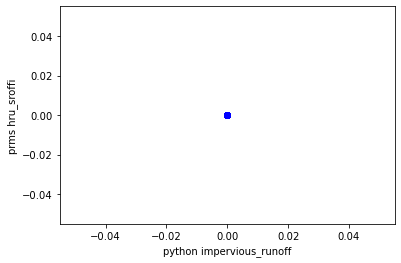

In [31]:
d1 = np.array(-sro_english_df["impervious_runoff"])
d2 = np.array(output_df["hru_sroffi"])
ax = plt.subplot(1, 1, 1)
ax.plot(d1, d2, "bo")
ax.set_xlabel("python impervious_runoff")
ax.set_ylabel("prms hru_sroffi")
dmax = max(d1.max(), d2.max())
ax.plot([0, dmax], [0, dmax], "k-")

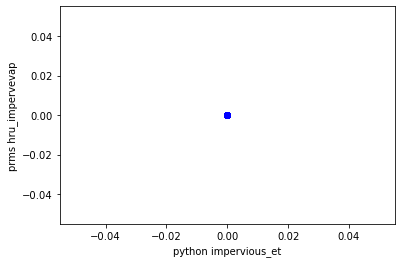

In [32]:
d1 = np.array(-sro_english_df["impervious_et"])
d2 = np.array(output_df["hru_impervevap"])
ax = plt.subplot(1, 1, 1)
ax.plot(d1, d2, "bo")
ax.set_xlabel("python impervious_et")
ax.set_ylabel("prms hru_impervevap")
dmax = max(d1.max(), d2.max())
ax.plot([0, dmax], [0, dmax], "k-")

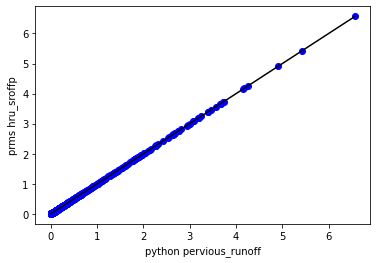

In [33]:
d1 = np.array(-sro_english_df["pervious_runoff"])
d2 = np.array(output_df["hru_sroffp"])
ax = plt.subplot(1, 1, 1)
ax.plot(d1, d2, "bo")
ax.set_xlabel("python pervious_runoff")
ax.set_ylabel("prms hru_sroffp")
dmax = max(d1.max(), d2.max())
ax.plot([0, dmax], [0, dmax], "k-")

In [34]:
err = d2 - d1
print(err.min(), err.max(), err.mean())

-1.3028035041884323e-06 0.004406032180731323 3.9880864203517136e-05


Text(0, 0.5, 'runoff error (prms - python)')

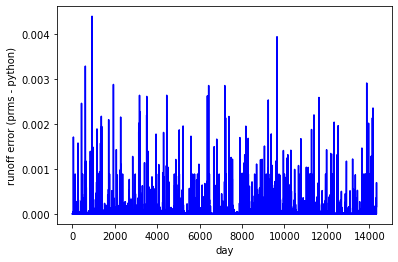

In [35]:
ax = plt.subplot(1, 1, 1)
ax.plot(err, "b-")
ax.set_xlabel("day")
ax.set_ylabel("runoff error (prms - python)")

Text(0, 0.5, 'pervious runoff')

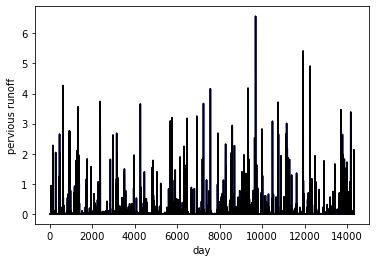

In [36]:
ax = plt.subplot(1, 1, 1)
ax.plot(d1, "b")
ax.plot(d2, "k")
ax.set_xlabel("day")
ax.set_ylabel("pervious runoff")